In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [86]:
true_df['label'] = 1
fake_df['label'] = 0

In [87]:
df = pd.concat([true_df, fake_df],ignore_index=True)
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label'],random_state=42,test_size=0.2)

In [89]:
max_len = 500
max_words = 10000

In [90]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [91]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [92]:
X_train_pad = pad_sequences(X_train_seq,maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq,maxlen=max_len)

In [93]:
vocab_size = 10000
model = Sequential([
    Embedding(vocab_size,128,input_length=max_len,mask_zero=True),
    LSTM(128,return_sequences=True,dropout=0.2),
    LSTM(64,dropout=0.2),
    Dense(1,activation='sigmoid')
])

C:\Users\workstation\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history = model.fit(X_train_pad,y_train,verbose=1,epochs=5,batch_size=32,validation_data = (X_test_pad,y_test))

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1046s 928ms/step - accuracy: 0.8904 - loss: 0.2529 - val_accuracy: 0.9879 - val_loss: 0.0568
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1171s 1s/step - accuracy: 0.9778 - loss: 0.0793 - val_accuracy: 0.9824 - val_loss: 0.0658
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1102s 982ms/step - accuracy: 0.9796 - loss: 0.0680 - val_accuracy: 0.9826 - val_loss: 0.0591
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1114s 992ms/step - accuracy: 0.9907 - loss: 0.0345 - val_accuracy: 0.9923 - val_loss: 0.0334
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 995s 886ms/step - accuracy: 0.9946 - loss: 0.0226 - val_accuracy: 0.9919 - val_loss: 0.0276


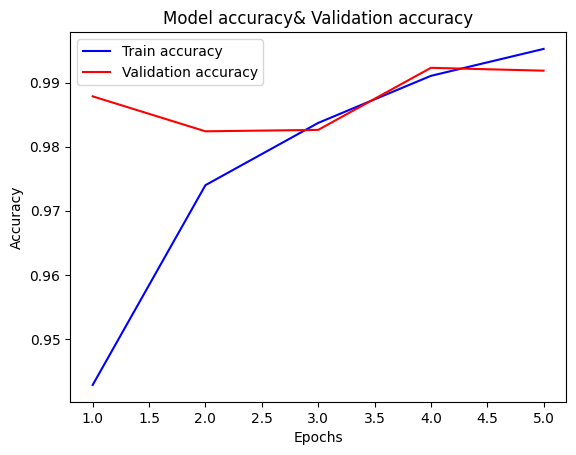

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,5+1)

plt.plot(epochs,acc,'b',label='Train accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.title('Model accuracy& Validation accuracy')
plt.show()

In [98]:
loss,acc = model.evaluate(X_test_pad,y_test,verbose=1,batch_size=32)
print(f'Model accuracy is : {acc}')

281/281 ━━━━━━━━━━━━━━━━━━━━ 56s 200ms/step - accuracy: 0.9914 - loss: 0.0279
Model accuracy is : 0.9918708205223083
